In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython import display

from sklearn.preprocessing import PolynomialFeatures

In [2]:
X = np.linspace(-20, 20, 200)
y = np.sin(X)

In [3]:
def phi(x, polysize=5):
    return np.array([x**i for i in range(0, polysize+1)])

In [4]:
def AnimationFunction(frame):
    if frame <= 3:
        frame += 3
    cap_phi = np.array(list(map(lambda x: phi(x, polysize=frame), X)))
    w = np.linalg.inv(cap_phi.T @ cap_phi) @ cap_phi.T @ y
    lines_plotted[0].set_data((X, cap_phi@w))
    
    ax.set_title(f"Polynomial of degree {frame+1}")
    
    for i in range(min(num_coefs, w.shape[0])):
        coefs[i].set_height(w[i])

<BarContainer object of 10 artists>


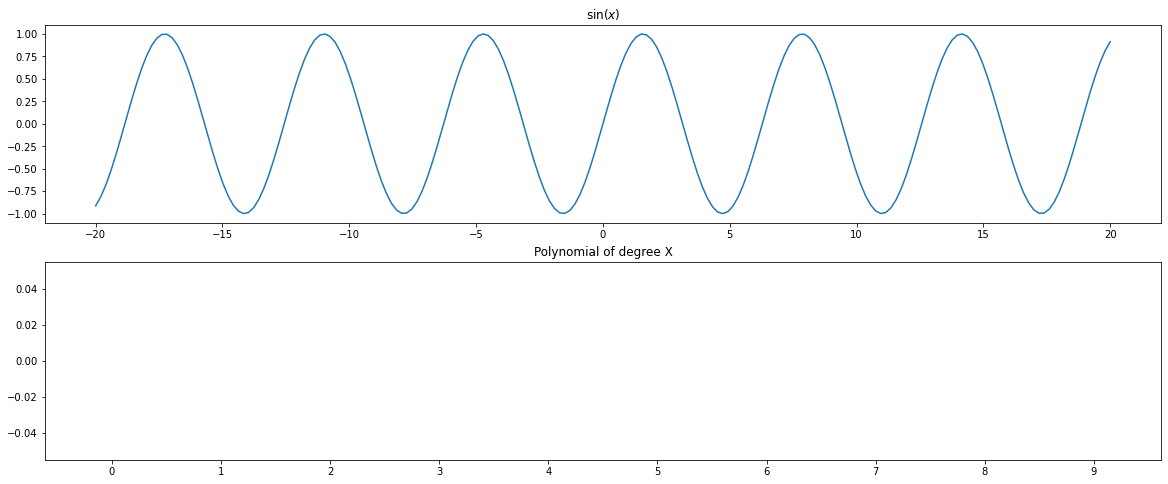

In [5]:
frames = 25
num_coefs = 10
fig = plt.figure(figsize=(20, 8))
plt.subplot(211)
plt.title("$\sin(x)$")
plt.plot(X, y)
lines_plotted = plt.plot([])

ax = plt.subplot(212)
coefs = ax.bar(np.arange(num_coefs), np.zeros(num_coefs), 0.3)
ax.set_title(f"Polynomial of degree X")
ax.set_xticks(np.arange(num_coefs))
print(coefs)

In [6]:
anim = FuncAnimation(fig, AnimationFunction, frames=frames, interval=300, blit=False)

In [7]:
vid = anim.to_html5_video()
html = display.HTML(vid)
display.display(html)

plt.close()